In [8]:
# 导入pandas并且更名为pd。
import pandas as pd
# 从互联网读取titanic数据。
titanic = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt')

In [9]:
# 分离数据特征与预测目标。
y = titanic['survived']
X = titanic.drop(['row.names', 'name', 'survived'], axis = 1)

In [10]:
# 对对缺失数据进行填充。
X['age'].fillna(X['age'].mean(), inplace=True)
X.fillna('UNKNOWN', inplace=True)

In [11]:
from sklearn.model_selection import train_test_split

# 分割数据，依然采样25%用于测试。
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [12]:
X_train.to_dict(orient='record')

[{'age': 31.19418104265403,
  'boat': 'UNKNOWN',
  'embarked': 'UNKNOWN',
  'home.dest': 'UNKNOWN',
  'pclass': '3rd',
  'room': 'UNKNOWN',
  'sex': 'male',
  'ticket': 'UNKNOWN'},
 {'age': 31.19418104265403,
  'boat': '9',
  'embarked': 'Cherbourg',
  'home.dest': 'Paris, France',
  'pclass': '1st',
  'room': 'B-35',
  'sex': 'female',
  'ticket': '17477 L69 6s'},
 {'age': 31.19418104265403,
  'boat': 'UNKNOWN',
  'embarked': 'UNKNOWN',
  'home.dest': 'UNKNOWN',
  'pclass': '3rd',
  'room': 'UNKNOWN',
  'sex': 'male',
  'ticket': 'UNKNOWN'},
 {'age': 32.0,
  'boat': 'UNKNOWN',
  'embarked': 'Southampton',
  'home.dest': 'Foresvik, Norway Portland, ND',
  'pclass': '3rd',
  'room': 'UNKNOWN',
  'sex': 'male',
  'ticket': 'UNKNOWN'},
 {'age': 31.19418104265403,
  'boat': 'UNKNOWN',
  'embarked': 'UNKNOWN',
  'home.dest': 'UNKNOWN',
  'pclass': '3rd',
  'room': 'UNKNOWN',
  'sex': 'male',
  'ticket': 'UNKNOWN'},
 {'age': 41.0,
  'boat': 'UNKNOWN',
  'embarked': 'Cherbourg',
  'home.dest'

## DictVectorizer 接收的对象是 dict

In [14]:
# 类别型特征向量化
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer()
X_train = vec.fit_transform(X_train.to_dict(orient='record'))
X_test = vec.transform(X_test.to_dict(orient='record'))

In [15]:
# 输出处理后特征向量的维度。
print(len(vec.feature_names_))

474


## 使用决策树模型依靠所有特征进行预测，并作性能评估

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.8206686930091185

In [20]:
X_train.shape

(984, 474)

## 从 sklearn 导入特征筛选器

### 使用卡方检验，得到前 20 相关的特征

In [19]:
from sklearn import feature_selection

# 筛选前 20% 的特征，使用相同配置的决策树模型进行预测，并且评估性能。
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=20)
X_train_fs = fs.fit_transform(X_train, y_train)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [18]:
X_train_fs.shape

(984, 94)

In [21]:
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
dt.score(X_test_fs, y_test)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0.8206686930091185

## 交叉验证

In [23]:
# 通过交叉验证（下一节将详细介绍）的方法，按照固定间隔的百分比筛选特征，并作图展示性能随特征筛选比例的变化。
from sklearn.model_selection import cross_val_score

In [34]:
import numpy as np

percentiles = range(1, 100, 2)

In [36]:
print(list(percentiles))

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]


In [25]:
results = []

for i in percentiles:
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = cross_val_score(dt, X_train_fs, y_train, cv=5)
    results = np.append(results, scores.mean())

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a no

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a no

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [37]:
print(results)

[0.85063904 0.85673057 0.87501546 0.88622964 0.86691404 0.86588332
 0.86895485 0.87203669 0.86489384 0.86691404 0.86486291 0.86590394
 0.86794475 0.86589363 0.86589363 0.86487322 0.86486291 0.8597918
 0.86386312 0.861812   0.86590394 0.86184292 0.86896516 0.86896516
 0.86793445 0.86590394 0.87198516 0.86486291 0.86486291 0.86590394
 0.86692435 0.86690373 0.86894455 0.87299526 0.86892393 0.86691404
 0.87199546 0.87098536 0.86690373 0.8740569  0.87403628 0.86691404
 0.85675119 0.86386312 0.86589363 0.86487322 0.86185323 0.86184292
 0.86183261 0.86488353]


In [38]:
max(results)

0.8862296433725005

In [40]:
# 找到提现最佳性能的特征筛选的百分比。
opt = np.where(results == results.max())[0]
opt

array([3])

In [48]:
print('Optimal number of features {}'.format(percentiles[opt[0]]))

Optimal number of features 7


In [49]:
percentiles

range(1, 100, 2)

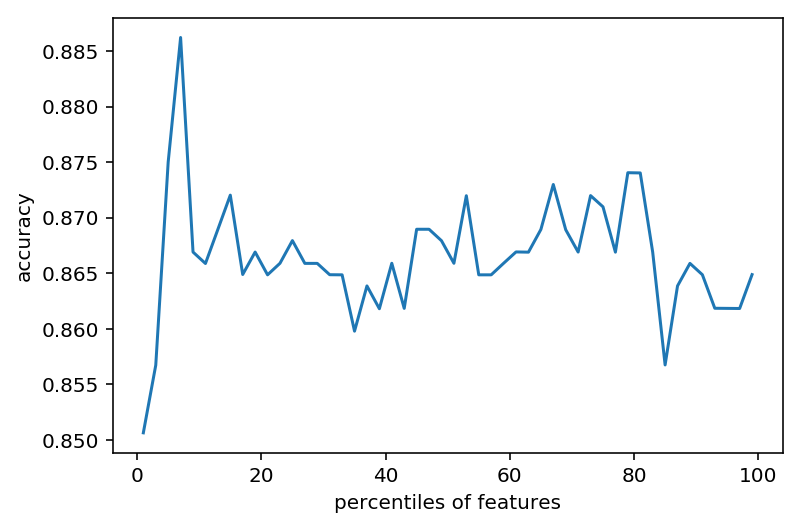

In [50]:
import pylab as pl

pl.plot(percentiles, results)
pl.xlabel('percentiles of features')
pl.ylabel('accuracy')
pl.show()

## 使用最佳筛选后的特征，利用相同配置的模型在测试集上进行性能评估

In [51]:
from sklearn.feature_selection import SelectPercentile

fs = SelectPercentile(feature_selection.chi2, percentile=7)
X_train_fs = fs.fit_transform(X_train, y_train)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [52]:
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
dt.score(X_test_fs, y_test)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0.8541033434650456